In [2]:
import pickle
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sampling_rate = [10, 20, 30, 60, 120]

In [3]:
def get_result_data(window_size): # 특정한 하나의 window_size에 대한 결과 데이터 반환
    with open(f"rdp_result\\result_my_{window_size}.pickle",'rb') as f: 
        rdp_my_data = pickle.load(f) # trendHMM

    with open(f"rdp_result\\result_org_{window_size}.pickle",'rb') as f:
        rdp_org_data = pickle.load(f) # HMM

    with open(f"non_rdp_result\\result_my_{window_size}.pickle",'rb') as f: 
        non_rdp_my_data = pickle.load(f) # trendHMM

    with open(f"non_rdp_result\\result_org_{window_size}.pickle",'rb') as f:
        non_rdp_org_data = pickle.load(f) # HMM
        
    return rdp_my_data, rdp_org_data, non_rdp_my_data, non_rdp_org_data # 4개의 리스트 반환


def get_rmf_value(window_size): # 특정한 하나의 window_size에 대한 (sampling_rate별) rmf 값 리스트 반환
    sampling_rate = [10, 20, 30, 60, 120]
    rdp_my_rmf_value = [0 for _ in range(len(sampling_rate))]
    rdp_org_rmf_value = [0 for _ in range(len(sampling_rate))]
    non_rdp_my_rmf_value = [0 for _ in range(len(sampling_rate))]
    non_rdp_org_rmf_value = [0 for _ in range(len(sampling_rate))]
    
    rdp_my_data, rdp_org_data, non_rdp_my_data, non_rdp_org_data = get_result_data(window_size)
    
    # 총 100개의 rmf 값을 다 더해서 평균을 낸다.
    
    for i in range(len(sampling_rate)):
        for j in range(len(rdp_my_data)):
                rdp_my_rmf_value[i] += rdp_my_data[j][i]
                rdp_org_rmf_value[i] += rdp_org_data[j][i]
                non_rdp_my_rmf_value[i] += non_rdp_my_data[j][i]
                non_rdp_org_rmf_value[i] += non_rdp_org_data[j][i]
                
        rdp_my_rmf_value[i] = rdp_my_rmf_value[i]/100
        rdp_org_rmf_value[i] = rdp_org_rmf_value[i]/100
        non_rdp_my_rmf_value[i] = non_rdp_my_rmf_value[i]/100
        non_rdp_org_rmf_value[i] = non_rdp_org_rmf_value[i]/100
        
    return rdp_my_rmf_value, rdp_org_rmf_value, non_rdp_my_rmf_value, non_rdp_org_rmf_value

def get_rmf_values(sampling_rate_list, window_size_list): # 각 윈도우 크기에 따른 각 샘플링 간격의 rmf값 리스트 반환. [window_size][sampling_rate]    
    rdp_my_rmf_values = [[] for _ in range(len(window_size_list))]
    rdp_org_rmf_values = [[] for _ in range(len(window_size_list))]
    non_rdp_my_rmf_values = [[] for _ in range(len(window_size_list))]
    non_rdp_org_rmf_values = [[] for _ in range(len(window_size_list))]
    
    # 해당 window_size행의 sampling_rate열에 따른 rmf값 리스트 찾기.
    for i in range(len(window_size_list)):
        window_size = window_size_list[i]
        # 해당 window_size행이 갖는 rmf 값 리스트.
        rdp_my_rmf_values[i], rdp_org_rmf_values[i], non_rdp_my_rmf_values[i], non_rdp_org_rmf_values[i] = get_rmf_value(window_size)
        
    return rdp_my_rmf_values, rdp_org_rmf_values, non_rdp_my_rmf_values, non_rdp_org_rmf_values



# 각 window_size의 sampling_rate별 rmf값 리스트 입력.
sampling_rate_list = [10, 20, 30, 60, 120]
window_size_list = [3, 4, 5, 6, 7, 8]
rdp_my_rmf_values, rdp_org_rmf_values, non_rdp_my_rmf_values, non_rdp_org_rmf_values = get_rmf_values(sampling_rate_list, window_size_list)

In [4]:
# 그 전에 행렬을 transpose. 바꿔줘야 함. plt 코드가 각 sampling rate의 window size에 따른 그래프임. 즉, x축 y축 변환 필요.

rdp_my_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]
rdp_org_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]
non_rdp_my_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]
non_rdp_org_rmf_list = [[0 for _ in range(len(window_size_list))] for _ in range(len(sampling_rate_list))]

for i in range(len(sampling_rate_list)):
    for j in range(len(window_size_list)):
        rdp_my_rmf_list[i][j] = rdp_my_rmf_values[j][i]
        rdp_org_rmf_list[i][j] = rdp_org_rmf_values[j][i]
        non_rdp_my_rmf_list[i][j] = non_rdp_my_rmf_values[j][i]
        non_rdp_org_rmf_list[i][j] = non_rdp_org_rmf_values[j][i]

In [7]:
import pandas as pd

for i in range(len(sampling_rate_list)):
    df = pd.DataFrame(rdp_my_rmf_list[i], columns = ['rdp_trendHMM_RMF'])
    df['non_rdp_trendHMM_RMF'] = non_rdp_my_rmf_list[i]
    df['rdp_HMM_RMF'] = rdp_org_rmf_list[i]
    df['non_rdp_HMM_RMF'] = non_rdp_org_rmf_list[i]

    sampling_rate = sampling_rate_list[i]
    df.to_csv(f"rmf_{sampling_rate}.csv", index = False)

C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_17508/3015937712.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_17508/3015937712.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_17508/3015937712.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_17508/3015937712.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_17508/3015937712.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])


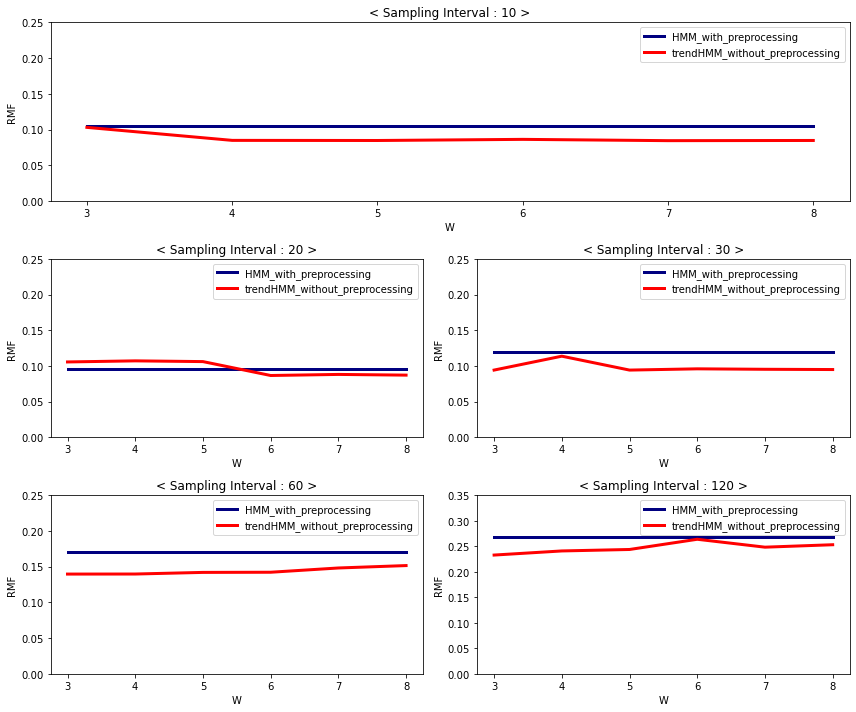

In [8]:
# 전처리 안 된 trendHMM과 전처리 된 HMM 비교

fig = plt.figure(tight_layout= True,facecolor='white')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.rc('font',size=10)
gs = gridspec.GridSpec(3,2)

ax = fig.add_subplot(gs[0, :])
ax.plot(rdp_org_rmf_list[0],color='navy',linewidth = 3,markersize=7,label="Sampling interval : 10")
ax.plot(non_rdp_my_rmf_list[0],color='red',linewidth = 3,markersize=7,label="Sampling interval : 10")
ax.legend(["HMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 10 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.

ax = fig.add_subplot(gs[1,0])
ax.plot(rdp_org_rmf_list[1],color='navy',linewidth = 3,markersize=7,label="Sampling interval : 20")
ax.plot(non_rdp_my_rmf_list[1],color='red',linewidth = 3,markersize=7,label="Sampling interval : 20")
ax.legend(["HMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 20 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,1])
ax.plot(rdp_org_rmf_list[2],color='navy',linewidth = 3,markersize=7,label="Sampling interval : 30")
ax.plot(non_rdp_my_rmf_list[2],color='red',linewidth = 3,markersize=7,label="Sampling interval : 30")
ax.legend(["HMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 30 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,0])
ax.plot(rdp_org_rmf_list[3],color='navy',linewidth = 3,markersize=7,label="Sampling interval : 60")
ax.plot(non_rdp_my_rmf_list[3],color='red',linewidth = 3,markersize=7,label="Sampling interval : 60")
ax.legend(["HMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 60 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,1])
ax.plot(rdp_org_rmf_list[4],color='navy',linewidth = 3,markersize=7,label="Sampling interval : 120")
ax.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,markersize=7,label="Sampling interval : 120")
ax.legend(["HMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 120 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels([3,3,4,5,6,7,8])


plt.savefig('trendHMM_unpreprocessing_and_HMM_preprocessing.png')

C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/577381883.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/577381883.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/577381883.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/577381883.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/577381883.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])


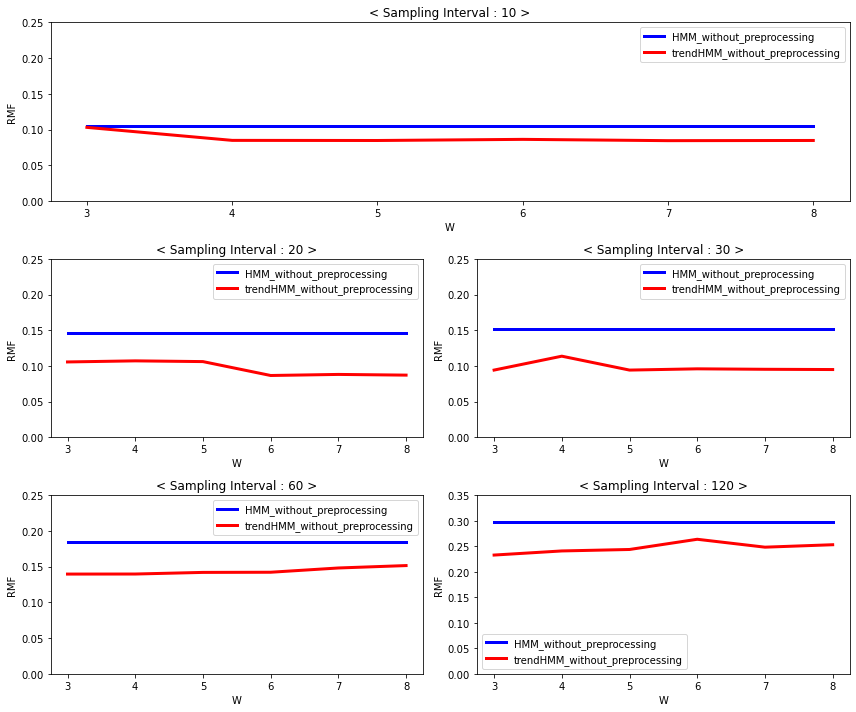

In [28]:
# 전처리 안 된 trendHMM과 전처리 안 된 HMM 비교

fig = plt.figure(tight_layout= True,facecolor='white')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.rc('font',size=10)
gs = gridspec.GridSpec(3,2)

ax = fig.add_subplot(gs[0, :])
ax.plot(non_rdp_org_rmf_list[0],color='blue',linewidth = 3,markersize=7,label="Sampling interval : 10")
ax.plot(non_rdp_my_rmf_list[0],color='red',linewidth = 3,markersize=7,label="Sampling interval : 10")
ax.legend(["HMM_without_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 10 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.

ax = fig.add_subplot(gs[1,0])
ax.plot(non_rdp_org_rmf_list[1],color='blue',linewidth = 3,markersize=7,label="Sampling interval : 20")
ax.plot(non_rdp_my_rmf_list[1],color='red',linewidth = 3,markersize=7,label="Sampling interval : 20")
ax.legend(["HMM_without_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 20 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,1])
ax.plot(non_rdp_org_rmf_list[2],color='blue',linewidth = 3,markersize=7,label="Sampling interval : 30")
ax.plot(non_rdp_my_rmf_list[2],color='red',linewidth = 3,markersize=7,label="Sampling interval : 30")
ax.legend(["HMM_without_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 30 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,0])
ax.plot(non_rdp_org_rmf_list[3],color='blue',linewidth = 3,markersize=7,label="Sampling interval : 60")
ax.plot(non_rdp_my_rmf_list[3],color='red',linewidth = 3,markersize=7,label="Sampling interval : 60")
ax.legend(["HMM_without_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 60 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,1])
ax.plot(non_rdp_org_rmf_list[4],color='blue',linewidth = 3,markersize=7,label="Sampling interval : 120")
ax.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,markersize=7,label="Sampling interval : 120")
ax.legend(["HMM_without_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 120 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels([3,3,4,5,6,7,8])


plt.savefig('trendHMM_unpreprocessing_and_HMM_unpreprocessing.png')

C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/1122386740.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/1122386740.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/1122386740.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/1122386740.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])
C:\Users\PEM-RA\AppData\Local\Temp\1/ipykernel_8244/1122386740.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([3,3,4,5,6,7,8])


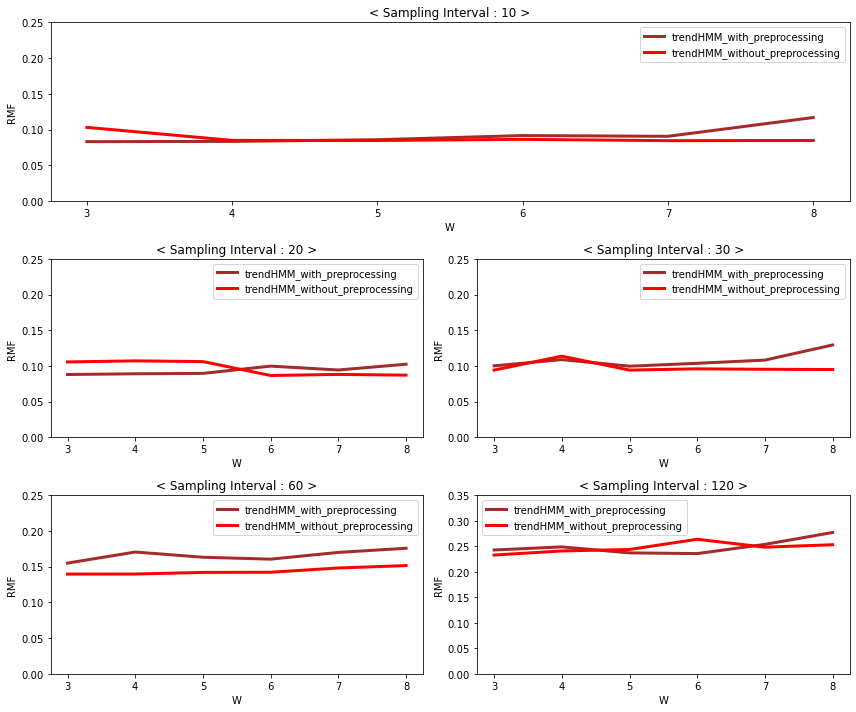

In [29]:
# 전처리 안 된 trendHMM과 전처리 된 trendHMM 비교

fig = plt.figure(tight_layout= True,facecolor='white')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.rc('font',size=10)
gs = gridspec.GridSpec(3,2)

ax = fig.add_subplot(gs[0, :])
ax.plot(rdp_my_rmf_list[0],color='brown',linewidth = 3,markersize=7,label="Sampling interval : 10")
ax.plot(non_rdp_my_rmf_list[0],color='red',linewidth = 3,markersize=7,label="Sampling interval : 10")
ax.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 10 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8]) # 3,3의 이유를 모르겠음.

ax = fig.add_subplot(gs[1,0])
ax.plot(rdp_my_rmf_list[1],color='brown',linewidth = 3,markersize=7,label="Sampling interval : 20")
ax.plot(non_rdp_my_rmf_list[1],color='red',linewidth = 3,markersize=7,label="Sampling interval : 20")
ax.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 20 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[1,1])
ax.plot(rdp_my_rmf_list[2],color='brown',linewidth = 3,markersize=7,label="Sampling interval : 30")
ax.plot(non_rdp_my_rmf_list[2],color='red',linewidth = 3,markersize=7,label="Sampling interval : 30")
ax.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 30 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,0])
ax.plot(rdp_my_rmf_list[3],color='brown',linewidth = 3,markersize=7,label="Sampling interval : 60")
ax.plot(non_rdp_my_rmf_list[3],color='red',linewidth = 3,markersize=7,label="Sampling interval : 60")
ax.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 60 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25])
ax.set_xticklabels([3,3,4,5,6,7,8])

ax = fig.add_subplot(gs[2,1])
ax.plot(rdp_my_rmf_list[4],color='brown',linewidth = 3,markersize=7,label="Sampling interval : 120")
ax.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,markersize=7,label="Sampling interval : 120")
ax.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
ax.set_ylabel('RMF')
ax.set_xlabel('W')
ax.set_title('< Sampling Interval : 120 >')
ax.set_yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels([3,3,4,5,6,7,8])


plt.savefig('trendHMM_unpreprocessing_and_trendHMM_preprocessing.png')

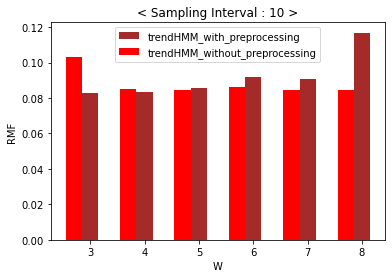

In [4]:
# 샘플링 간격 10 고정
# rdp가 적용된 trendHMM과 아닌 trendHMM
x = np.arange(6)
plt.xlabel('W')
plt.ylabel('RMF')
plt.bar(x, rdp_my_rmf_list[0], width = 0.3, label='trendHMM_with_preprocessing', color='brown')
plt.bar(x-0.3, non_rdp_my_rmf_list[0], width = 0.3, label='trendHMM_without_preprocessing', color='red')
plt.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
plt.title('< Sampling Interval : 10 >')
plt.xticks(x, [3, 4, 5, 6, 7, 8])

plt.savefig('trendHMM_with_without_preprocessing_sampling10.png')
plt.show()

In [5]:
print(rdp_my_rmf_list[0])
print(non_rdp_my_rmf_list[0])

[0.08306797017098011, 0.08344298461750162, 0.08578308137041796, 0.09160386738774799, 0.09054523921674106, 0.11684343351624961]
[0.1030549267901229, 0.08486738621706875, 0.08469576445342163, 0.08627793943651127, 0.0844640372421511, 0.08473042526770666]


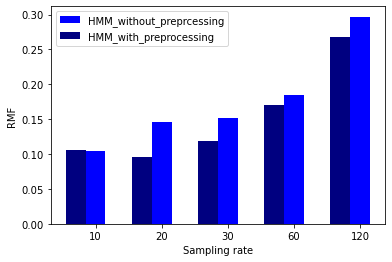

In [61]:
# 전처리 안 된 HMM and 전처리된 HMM
x = np.arange(5)
plt.xlabel('Sampling rate')
plt.ylabel('RMF')
plt.bar(x, non_rdp_org_rmf_values[0], width = 0.3, label='HMM_without_preprcessing', color='blue')
plt.bar(x-0.3, rdp_org_rmf_values[0], width = 0.3, label='HMM_with_preprocessing', color='navy')
plt.legend(["HMM_without_preprcessing", "HMM_with_preprocessing"])
plt.xticks(x, sampling_rate_list)

plt.savefig('HMM_unpreprocessing_and_HMM_preprocessing.png')
plt.show()

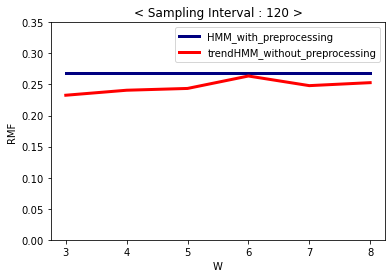

In [29]:
# 전처리 안 된 trendHMM과 전처리 된 HMM 비교
x = np.arange(6)
sampling_intervals = [10,20,30,60,120]
for i in range(4):
    plt.clf()
    plt.plot(rdp_org_rmf_list[i],color='navy',linewidth = 3,markersize=7,label=f"Sampling interval : {sampling_intervals[i]}")
    plt.plot(non_rdp_my_rmf_list[i],color='red',linewidth = 3,markersize=7,label=f"Sampling interval : {sampling_intervals[i]}")
    plt.legend(["HMM_with_preprocessing", "trendHMM_without_preprocessing"])
    plt.ylabel('RMF')
    plt.xlabel('W')
    plt.title(f'< Sampling Interval : {sampling_intervals[i]} >')
    plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25])
    plt.xticks(x, [3,4,5,6,7,8])
    plt.savefig(f'trendHMM_unpreprocessing_and_HMM_preprocessing_{sampling_intervals[i]}.png')
    
plt.clf()
plt.plot(rdp_org_rmf_list[4],color='navy',linewidth = 3,markersize=7,label="Sampling interval : 120")
plt.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,markersize=7,label="Sampling interval : 120")
plt.legend(["HMM_with_preprocessing", "trendHMM_without_preprocessing"])
plt.ylabel('RMF')
plt.xlabel('W')
plt.title('< Sampling Interval : 120 >')
plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
plt.xticks(x, [3,4,5,6,7,8])
plt.savefig('trendHMM_unpreprocessing_and_HMM_preprocessing_120.png')

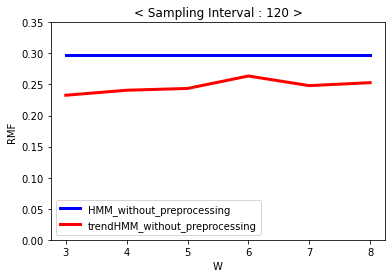

In [30]:
# 전처리 안 된 trendHMM과 전처리 안 된 HMM 비교
x = np.arange(6)
sampling_intervals = [10,20,30,60,120]
for i in range(4):
    plt.clf()
    plt.plot(non_rdp_org_rmf_list[i],color='blue',linewidth = 3,markersize=7,label=f"Sampling interval : {sampling_intervals[i]}")
    plt.plot(non_rdp_my_rmf_list[i],color='red',linewidth = 3,markersize=7,label=f"Sampling interval : {sampling_intervals[i]}")
    plt.legend(["HMM_without_preprocessing", "trendHMM_without_preprocessing"])
    plt.ylabel('RMF')
    plt.xlabel('W')
    plt.title(f'< Sampling Interval : {sampling_intervals[i]} >')
    plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25])
    plt.xticks(x, [3,4,5,6,7,8])
    plt.savefig(f'trendHMM_unpreprocessing_and_HMM_unpreprocessing_{sampling_intervals[i]}.png')
    
plt.clf()
plt.plot(non_rdp_org_rmf_list[4],color='blue',linewidth = 3,markersize=7,label="Sampling interval : 120")
plt.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,markersize=7,label="Sampling interval : 120")
plt.legend(["HMM_without_preprocessing", "trendHMM_without_preprocessing"])
plt.ylabel('RMF')
plt.xlabel('W')
plt.title('< Sampling Interval : 120 >')
plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
plt.xticks(x, [3,4,5,6,7,8])
plt.savefig('trendHMM_unpreprocessing_and_HMM_unpreprocessing_120.png')

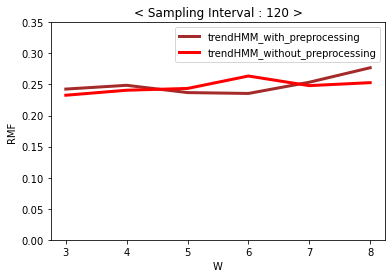

In [33]:
# 전처리 안 된 trendHMM과 전처리 된 trendHMM 비교
x = np.arange(6)
sampling_intervals = [10,20,30,60,120]
for i in range(4):
    plt.clf()
    plt.plot(rdp_my_rmf_list[i],color='brown',linewidth = 3,markersize=7,label=f"Sampling interval : {sampling_intervals[i]}")
    plt.plot(non_rdp_my_rmf_list[i],color='red',linewidth = 3,markersize=7,label=f"Sampling interval : {sampling_intervals[i]}")
    plt.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
    plt.ylabel('RMF')
    plt.xlabel('W')
    plt.title(f'< Sampling Interval : {sampling_intervals[i]} >')
    plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25])
    plt.xticks(x, [3,4,5,6,7,8])
    plt.savefig(f'trendHMM_unpreprocessing_and_trendHMM_preprocessing_{sampling_intervals[i]}.png')
    
plt.clf()
plt.plot(rdp_my_rmf_list[4],color='brown',linewidth = 3,markersize=7,label="Sampling interval : 120")
plt.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,markersize=7,label="Sampling interval : 120")
plt.legend(["trendHMM_with_preprocessing", "trendHMM_without_preprocessing"])
plt.ylabel('RMF')
plt.xlabel('W')
plt.title('< Sampling Interval : 120 >')
plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
plt.xticks(x, [3,4,5,6,7,8])
plt.savefig('trendHMM_unpreprocessing_and_trendHMM_preprocessing_120.png')

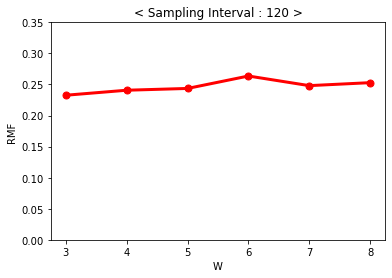

In [5]:
# 전처리 안 된 trendHMM only
x = np.arange(6)
sampling_intervals = [10,20,30,60,120]
for i in range(4):
    plt.clf()
    plt.plot(non_rdp_my_rmf_list[i],color='red',linewidth = 3,marker='o',markersize=7,label=f"Sampling interval : {sampling_intervals[i]}")
    plt.ylabel('RMF')
    plt.xlabel('W')
    plt.title(f'< Sampling Interval : {sampling_intervals[i]} >')
    plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25])
    plt.xticks(x, [3,4,5,6,7,8])
    plt.savefig(f'trendHMM_unpreprocessing_only_{sampling_intervals[i]}.png')
    
plt.clf()
plt.plot(non_rdp_my_rmf_list[4],color='red',linewidth = 3,marker='o',markersize=7,label="Sampling interval : 120")
plt.ylabel('RMF')
plt.xlabel('W')
plt.title('< Sampling Interval : 120 >')
plt.yticks([0, 0.05, 0.1,0.15,0.2,0.25,0.3,0.35])
plt.xticks(x, [3,4,5,6,7,8])
plt.savefig('trendHMM_unpreprocessing_only_120.png')